<a href="https://colab.research.google.com/github/PranayJagtap06/ML_Projects/blob/main/IndianEconomyMacroeconomicIndicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Macroeconomic Indicators of India**
The Macroeconomic Indicators dataset from [RBI database](https://cimsdbie.rbi.org.in/#/dbie/home) on Indian economy is a collection of data on various aspects of the Indian economy such as foreign exchange reserves, bank rates, treasury bills, etc. The dataset is updated monthly and covers the period from October 2017 to October 2023.

From this dataset we will predict Foreign Exchange Reserves of India. For this task I will compare and evaluate all possible models.

## Loading Dataset and Importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
from plotly.offline import init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
pio.templates.default = 'seaborn'

In [5]:
df = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/MacroeconomicIndicators.xlsx',sheet_name='Weekly',engine='openpyxl')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,Macro-economic Indicators - Weekly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Period,Forward Premia of US$ 1-month (%),Forward Premia of US$ 3-month (%),Forward Premia of US$ 6-month (%),Reverse Repo Rate (%),Marginal Standing Facility (MSF) Rate (%),Bank Rate (%),Base Rate (%),91-Day Treasury Bill (Primary) Yield (%),182-Day Treasury Bill (Primary) Yield (%),364-Day Treasury Bill (Primary) Yield (%),10-Year G-Sec Yield (FBIL) (%),Cash Reserve Ratio (%),Statutory Liquidity Ratio (%),Policy Repo Rate (%),Standing Deposit Facility (SDF) Rate (%),Foreign Exchange Reserves \n(US $ Million)
3,NaN,2023-10-06 00:00:00,1.67,1.71,1.8,3.35,6.75,6.75,8.95,6.864,7.0999,7.1306,7.34,4.5,18,6.5,6.25,584741.5
4,NaN,2023-09-29 00:00:00,1.88,1.69,1.75,3.35,6.75,6.75,8.85,6.8648,7.0778,7.0846,7.22,4.5,18,6.5,6.25,586907.63


## Cleaning Dataset
The dataset has some redundent rows and columns so I will go ahead and drop them.

### Dropping null rows and columns.

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.drop(index=[0,1],inplace=True)

In [8]:
df.reset_index(inplace=True)

In [9]:
df.drop('index',axis=1,inplace=True)
df.columns = df.iloc[0]

In [10]:
df.drop(index=0,inplace=True)
df.reset_index(inplace=True)

In [11]:
df.drop('index',axis=1,inplace=True)

In [ ]:
df.head()

,Period,Forward Premia of US$ 1-month (%),Forward Premia of US$ 3-month (%),Forward Premia of US$ 6-month (%),Reverse Repo Rate (%),Marginal Standing Facility (MSF) Rate (%),Bank Rate (%),Base Rate (%),91-Day Treasury Bill (Primary) Yield (%),182-Day Treasury Bill (Primary) Yield (%),364-Day Treasury Bill (Primary) Yield (%),10-Year G-Sec Yield (FBIL) (%),Cash Reserve Ratio (%),Statutory Liquidity Ratio (%),Policy Repo Rate (%),Standing Deposit Facility (SDF) Rate (%),Foreign Exchange Reserves \n(US $ Million)
0,2023-10-06 00:00:00,1.67,1.71,1.8,3.35,6.75,6.75,8.95,6.864,7.0999,7.1306,7.34,4.5,18,6.5,6.25,584741.5
1,2023-09-29 00:00:00,1.88,1.69,1.75,3.35,6.75,6.75,8.85,6.8648,7.0778,7.0846,7.22,4.5,18,6.5,6.25,586907.63
2,2023-09-22 00:00:00,1.54,1.6,1.64,3.35,6.75,6.75,8.85,6.8548,7.0671,7.089,7.16,4.5,18,6.5,6.25,590701.81
3,2023-09-15 00:00:00,1.44,1.54,1.59,3.35,6.75,6.75,8.85,6.8474,7.0494,7.0599,7.16,4.5,18,6.5,6.25,593037.09
4,2023-09-08 00:00:00,1.38,1.43,1.53,3.35,6.75,6.75,8.85,6.8001,7.0243,7.03,7.17,4.5,18,6.5,6.25,593904.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Period                                     313 non-null    object
 1   Forward Premia of US$ 1-month (%)          313 non-null    object
 2   Forward Premia of US$ 3-month (%)          313 non-null    object
 3   Forward Premia of US$ 6-month (%)          313 non-null    object
 4   Reverse Repo Rate (%)                      313 non-null    object
 5   Marginal Standing Facility (MSF) Rate (%)  313 non-null    object
 6   Bank Rate (%)                              313 non-null    object
 7   Base Rate (%)                              313 non-null    object
 8   91-Day Treasury Bill (Primary) Yield (%)   313 non-null    object
 9   182-Day Treasury Bill (Primary) Yield (%)  313 non-null    object
 10  364-Day Treasury Bill (Primary) Yield 

### Converting columns dtype from object to numeric.
Most of the columns has numeric values as object type, so I will change them to numeric data type. And changing Period feature to datetime datatype.

In [12]:
df['Forward Premia of US$ 1-month (%)'] = pd.to_numeric(df['Forward Premia of US$ 1-month (%)'],errors='coerce')

In [13]:
df['Forward Premia of US$ 3-month (%)'] = pd.to_numeric(df['Forward Premia of US$ 3-month (%)'],errors='coerce')

In [14]:
df['Forward Premia of US$ 6-month (%)'] = pd.to_numeric(df['Forward Premia of US$ 6-month (%)'],errors='coerce')

In [15]:
df['Reverse Repo Rate (%)'] = pd.to_numeric(df['Reverse Repo Rate (%)'],errors='coerce')

In [16]:
df['Marginal Standing Facility (MSF) Rate (%)'] = pd.to_numeric(df['Marginal Standing Facility (MSF) Rate (%)'],errors='coerce')

In [17]:
df['Bank Rate (%)'] = pd.to_numeric(df['Bank Rate (%)'],errors='coerce')

In [18]:
df['Base Rate (%)'] = pd.to_numeric(df['Base Rate (%)'],errors='coerce')

In [19]:
df['91-Day Treasury Bill (Primary) Yield (%)'] = pd.to_numeric(df['91-Day Treasury Bill (Primary) Yield (%)'],errors='coerce')

In [20]:
df['182-Day Treasury Bill (Primary) Yield (%)'] = pd.to_numeric(df['182-Day Treasury Bill (Primary) Yield (%)'],errors='coerce')

In [21]:
df['364-Day Treasury Bill (Primary) Yield (%)'] = pd.to_numeric(df['364-Day Treasury Bill (Primary) Yield (%)'],errors='coerce')

In [22]:
df['10-Year G-Sec Yield (FBIL) (%)'] = pd.to_numeric(df['10-Year G-Sec Yield (FBIL) (%)'],errors='coerce')

In [23]:
df['Cash Reserve Ratio (%)'] = pd.to_numeric(df['Cash Reserve Ratio (%)'],errors='coerce')

In [24]:
df['Statutory Liquidity Ratio (%)'] = pd.to_numeric(df['Statutory Liquidity Ratio (%)'],errors='coerce')

In [25]:
df['Policy Repo Rate (%)'] = pd.to_numeric(df['Policy Repo Rate (%)'],errors='coerce')

In [26]:
df['Standing Deposit Facility (SDF) Rate (%)'] = pd.to_numeric(df['Standing Deposit Facility (SDF) Rate (%)'],errors='coerce')

In [27]:
df['Foreign Exchange Reserves \n(US $ Million)'] = pd.to_numeric(df['Foreign Exchange Reserves \n(US $ Million)'],errors='coerce')

In [28]:
df['Period'] = pd.to_datetime(df['Period'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Period                                     313 non-null    datetime64[ns]
 1   Forward Premia of US$ 1-month (%)          313 non-null    float64       
 2   Forward Premia of US$ 3-month (%)          313 non-null    float64       
 3   Forward Premia of US$ 6-month (%)          313 non-null    float64       
 4   Reverse Repo Rate (%)                      313 non-null    float64       
 5   Marginal Standing Facility (MSF) Rate (%)  313 non-null    float64       
 6   Bank Rate (%)                              313 non-null    float64       
 7   Base Rate (%)                              313 non-null    float64       
 8   91-Day Treasury Bill (Primary) Yield (%)   312 non-null    float64       
 9   182-Day Treasury Bill

### Dropping NA values and columns.

In [ ]:
df.isnull().sum()

0
Period                                          0
Forward Premia of US$ 1-month (%)               0
Forward Premia of US$ 3-month (%)               0
Forward Premia of US$ 6-month (%)               0
Reverse Repo Rate (%)                           0
Marginal Standing Facility (MSF) Rate (%)       0
Bank Rate (%)                                   0
Base Rate (%)                                   0
91-Day Treasury Bill (Primary) Yield (%)        1
182-Day Treasury Bill (Primary) Yield (%)       0
364-Day Treasury Bill (Primary) Yield (%)       0
10-Year G-Sec Yield (FBIL) (%)                  0
Cash Reserve Ratio (%)                          0
Statutory Liquidity Ratio (%)                   0
Policy Repo Rate (%)                            0
Standing Deposit Facility (SDF) Rate (%)      234
Foreign Exchange Reserves \n(US $ Million)      0
dtype: int64

It is obvious that Standing Deposit Facility (SDF) Rate (%) feature is have most of the values as null. So I will try and fill the missing values with the mean value of Standing Deposit Facility (SDF) Rate (%).

In [29]:
df.fillna(df.mean(), inplace=True);

In [ ]:
df.isnull().sum()

0
Period                                        0
Forward Premia of US$ 1-month (%)             0
Forward Premia of US$ 3-month (%)             0
Forward Premia of US$ 6-month (%)             0
Reverse Repo Rate (%)                         0
Marginal Standing Facility (MSF) Rate (%)     0
Bank Rate (%)                                 0
Base Rate (%)                                 0
91-Day Treasury Bill (Primary) Yield (%)      0
182-Day Treasury Bill (Primary) Yield (%)     0
364-Day Treasury Bill (Primary) Yield (%)     0
10-Year G-Sec Yield (FBIL) (%)                0
Cash Reserve Ratio (%)                        0
Statutory Liquidity Ratio (%)                 0
Policy Repo Rate (%)                          0
Standing Deposit Facility (SDF) Rate (%)      0
Foreign Exchange Reserves \n(US $ Million)    0
dtype: int64

## Reviewing Dataset

In [ ]:
df.describe()

,Forward Premia of US$ 1-month (%),Forward Premia of US$ 3-month (%),Forward Premia of US$ 6-month (%),Reverse Repo Rate (%),Marginal Standing Facility (MSF) Rate (%),Bank Rate (%),Base Rate (%),91-Day Treasury Bill (Primary) Yield (%),182-Day Treasury Bill (Primary) Yield (%),364-Day Treasury Bill (Primary) Yield (%),10-Year G-Sec Yield (FBIL) (%),Cash Reserve Ratio (%),Statutory Liquidity Ratio (%),Policy Repo Rate (%),Standing Deposit Facility (SDF) Rate (%),Foreign Exchange Reserves \n(US $ Million)
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,3.753467,3.772108,3.814254,4.309585,5.513738,5.513738,8.197284,5.194542,5.442296,5.592311,6.922794,3.936102,18.471246,5.263738,5.612658,514539.899077
std,1.094816,0.991583,0.959681,1.171990,1.017217,1.017217,0.688505,1.408069,1.409315,1.393577,0.612853,0.476102,0.630721,1.017217,0.397437,85856.064994
min,1.160000,1.210000,1.290000,3.350000,4.250000,4.250000,7.250000,2.929200,3.259900,3.389200,5.726800,3.000000,18.000000,4.000000,3.750000,392078.700000
25%,3.346090,3.514110,3.700088,3.350000,4.250000,4.250000,7.400000,3.522200,3.789900,3.949000,6.379100,4.000000,18.000000,4.000000,5.612658,421720.700000
50%,3.840000,3.950000,4.110000,3.350000,5.650000,5.650000,8.450000,5.558600,5.909900,6.139000,7.040100,4.000000,18.000000,5.400000,5.612658,538191.260000
75%,4.320000,4.370000,4.380000,5.750000,6.500000,6.500000,8.850000,6.437400,6.759900,6.879900,7.391500,4.000000,19.250000,6.250000,5.612658,590185.220000
max,8.978748,5.932387,5.587258,6.250000,6.750000,6.750000,8.950000,7.185800,7.446200,7.768300,8.073200,4.500000,20.000000,6.500000,6.250000,642453.190000


In [ ]:
df.corr(numeric_only=False)

,Period,Forward Premia of US$ 1-month (%),Forward Premia of US$ 3-month (%),Forward Premia of US$ 6-month (%),Reverse Repo Rate (%),Marginal Standing Facility (MSF) Rate (%),Bank Rate (%),Base Rate (%),91-Day Treasury Bill (Primary) Yield (%),182-Day Treasury Bill (Primary) Yield (%),364-Day Treasury Bill (Primary) Yield (%),10-Year G-Sec Yield (FBIL) (%),Cash Reserve Ratio (%),Statutory Liquidity Ratio (%),Policy Repo Rate (%),Standing Deposit Facility (SDF) Rate (%),Foreign Exchange Reserves \n(US $ Million)
0,,,,,,,,,,,,,,,,,
Period,1.000000,-0.643914,-0.651865,-0.653500,-8.759297e-01,-0.199607,-0.199607,-0.435053,-0.175651,-0.130074,-0.120887,-0.216862,0.320014,-8.706725e-01,-0.199607,1.141065e-01,0.871462
Forward Premia of US$ 1-month (%),-0.643914,1.000000,0.923649,0.866156,4.447916e-01,-0.265663,-0.265663,-0.097502,-0.243501,-0.252329,-0.239806,-0.033529,-0.435295,4.319933e-01,-0.265663,-3.428831e-01,-0.413336
Forward Premia of US$ 3-month (%),-0.651865,0.923649,1.000000,0.964529,4.019977e-01,-0.380012,-0.380012,-0.192769,-0.364751,-0.378152,-0.362652,-0.145307,-0.530532,3.877555e-01,-0.380012,-3.605524e-01,-0.348007
Forward Premia of US$ 6-month (%),-0.653500,0.866156,0.964529,1.000000,3.657783e-01,-0.467169,-0.467169,-0.244912,-0.463654,-0.481300,-0.467079,-0.261048,-0.587747,3.478604e-01,-0.467169,-3.567545e-01,-0.301995
Reverse Repo Rate (%),-0.875930,0.444792,0.401998,0.365778,1.000000e+00,0.586497,0.586497,0.732120,0.574952,0.536373,0.529450,0.570832,0.091283,9.629551e-01,0.586497,-2.859171e-15,-0.936666
Marginal Standing Facility (MSF) Rate (%),-0.199607,-0.265663,-0.380012,-0.467169,5.864966e-01,1.000000,1.000000,0.884639,0.982492,0.970804,0.954556,0.813165,0.631694,5.911698e-01,1.000000,3.907102e-01,-0.565342
Bank Rate (%),-0.199607,-0.265663,-0.380012,-0.467169,5.864966e-01,1.000000,1.000000,0.884639,0.982492,0.970804,0.954556,0.813165,0.631694,5.911698e-01,1.000000,3.907102e-01,-0.565342
Base Rate (%),-0.435053,-0.097502,-0.192769,-0.244912,7.321201e-01,0.884639,0.884639,1.000000,0.855284,0.818177,0.782710,0.623110,0.424800,6.814332e-01,0.884639,3.978059e-01,-0.750186
91-Day Treasury Bill (Primary) Yield (%),-0.175651,-0.243501,-0.364751,-0.463654,5.749524e-01,0.982492,0.982492,0.855284,1.000000,0.992184,0.983408,0.868235,0.696590,5.817278e-01,0.982492,2.884030e-01,-0.547195


## Exploratory Data Analysis

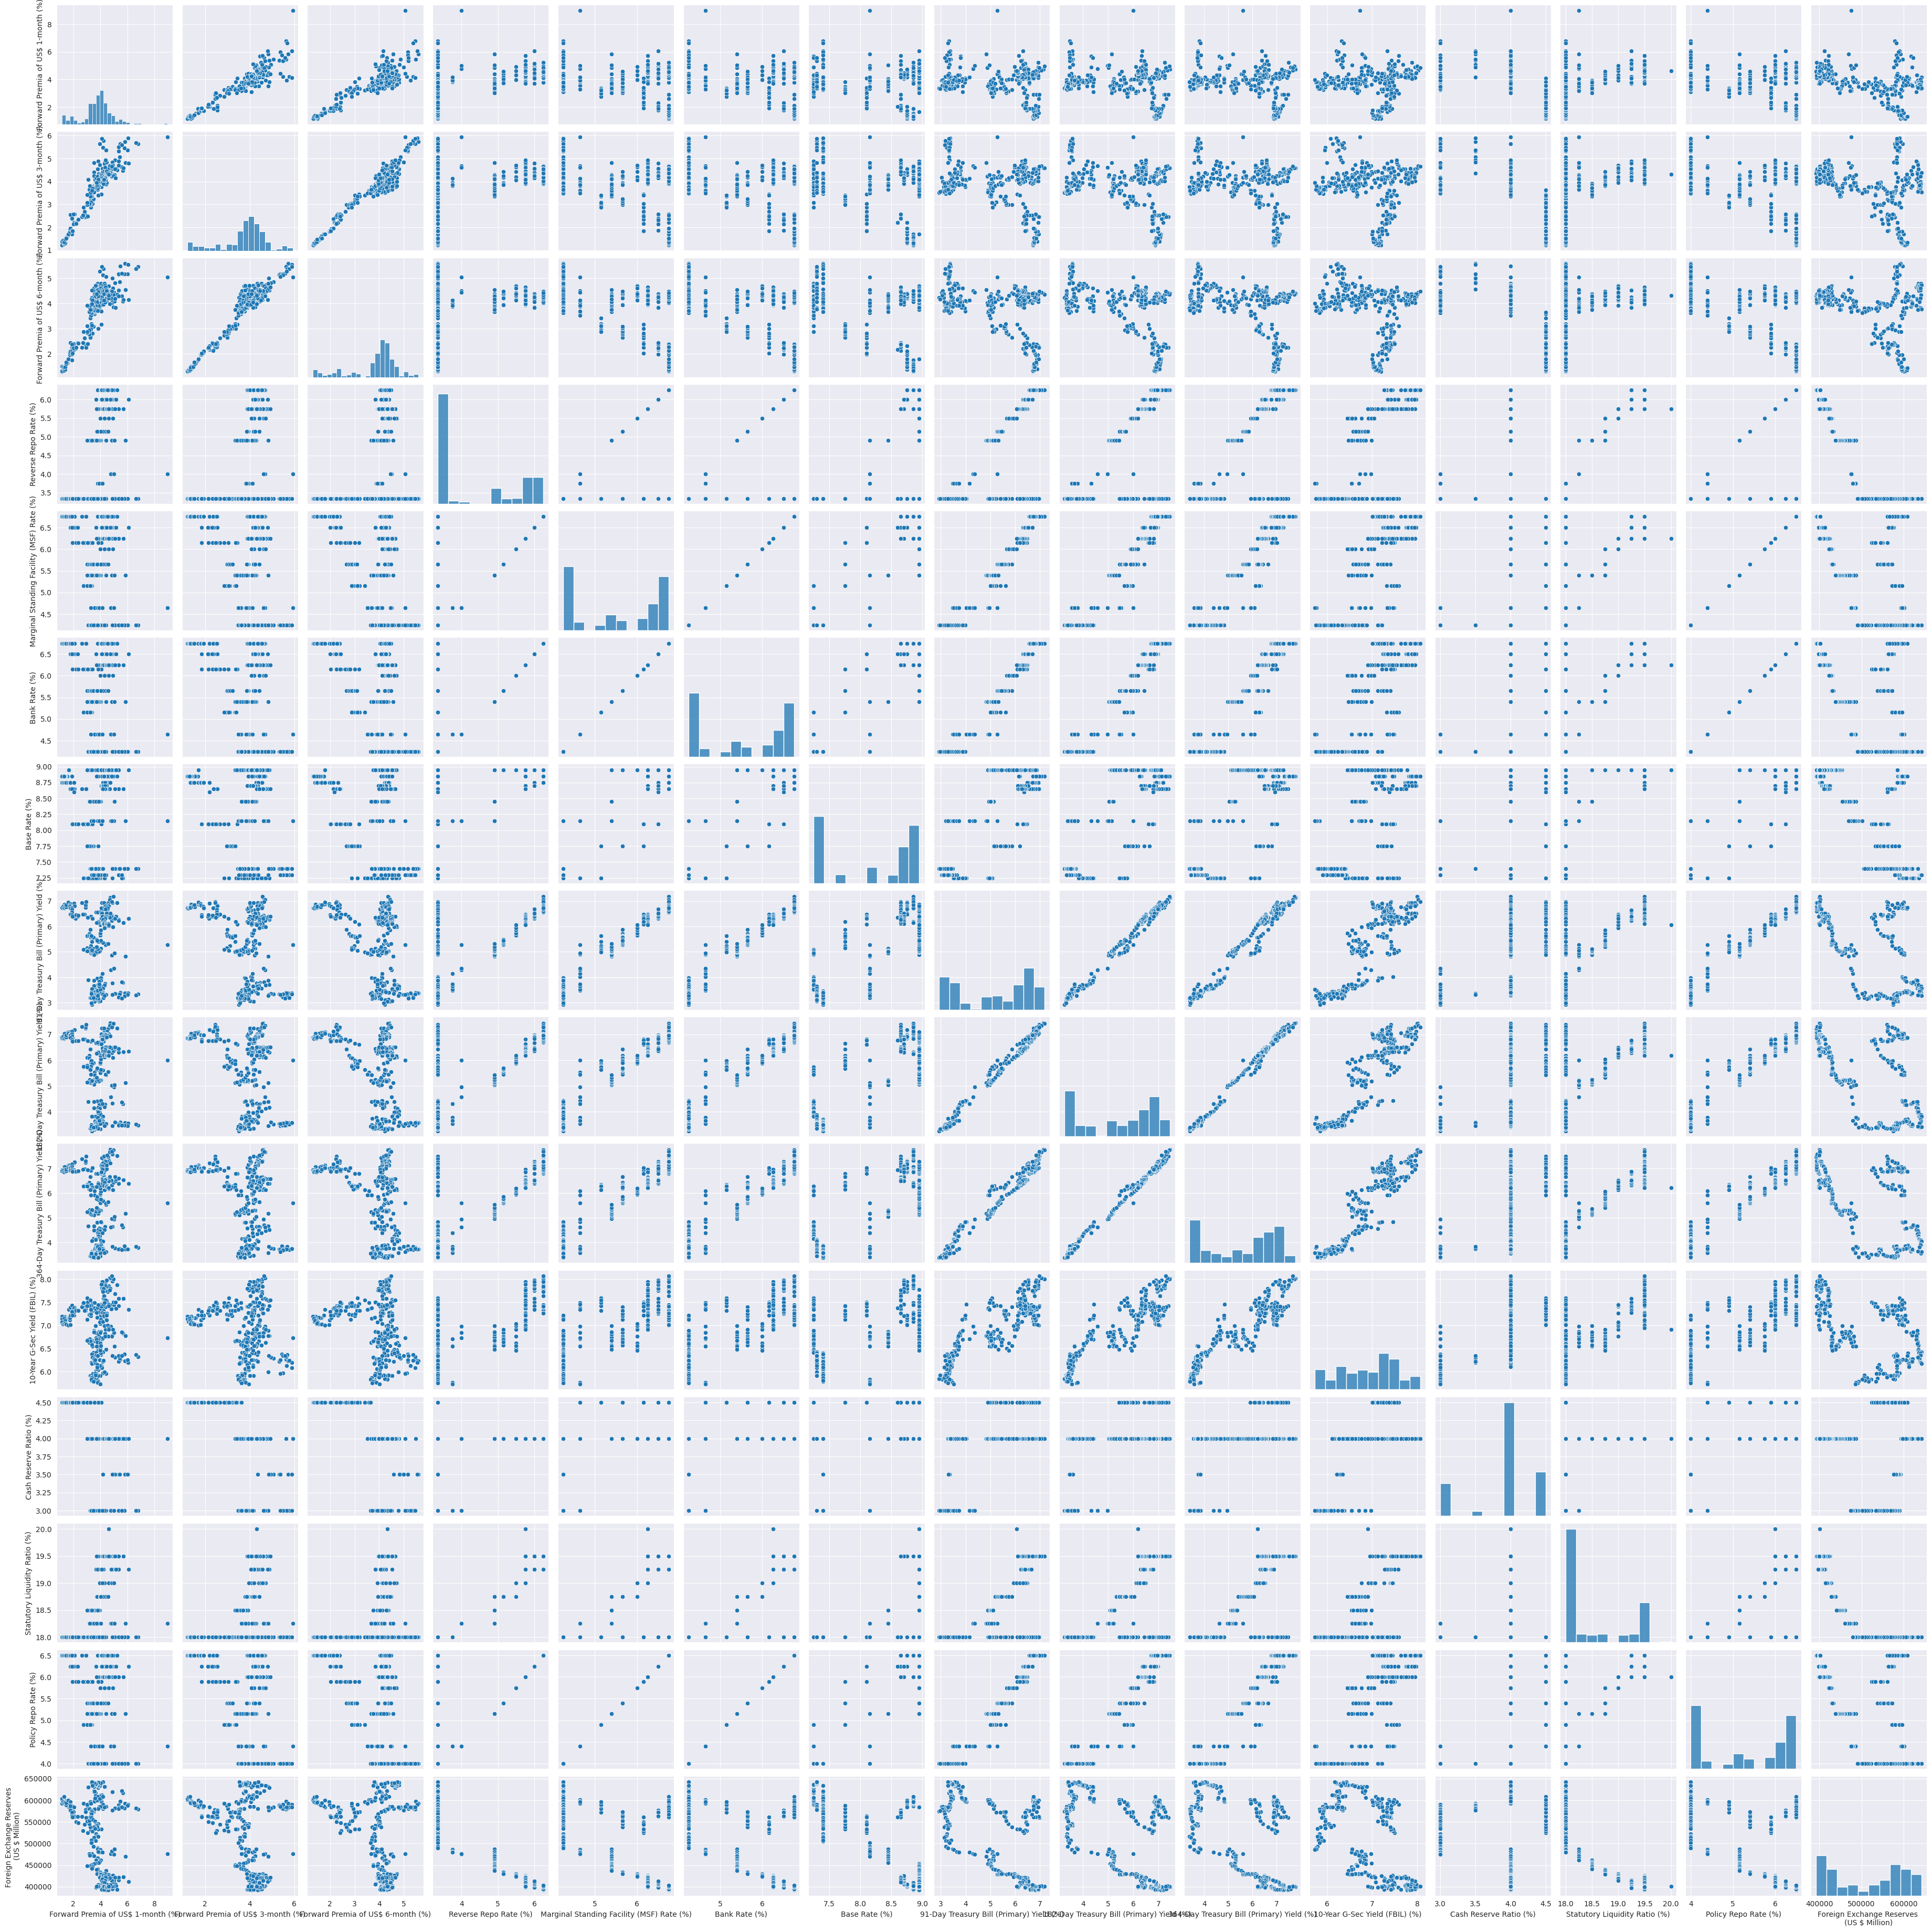

In [ ]:
sns.pairplot(df)

Now I will try focus on how correlated the Foreign Exchange Reserves \n(US $ Million) feature is with other features.

In [ ]:
fig1 = px.bar(data_frame=df.corr(numeric_only=False)['Foreign Exchange Reserves \n(US $ Million)'][:-1].sort_values(ascending=False),
              x=df.corr(numeric_only=False)['Foreign Exchange Reserves \n(US $ Million)'][:-1].sort_values(ascending=False).values,
              y=df.corr(numeric_only=False)['Foreign Exchange Reserves \n(US $ Million)'][:-1].sort_values(ascending=False).index,
              color=df.corr(numeric_only=False)['Foreign Exchange Reserves \n(US $ Million)'][:-1].sort_values(ascending=False).index,
              color_discrete_sequence=px.colors.sequential.Viridis_r, title='Foreign Exchange Reserves Correlation', height=600)
fig1.update_xaxes(title_text='Correlation')
fig1.update_yaxes(title_text='Features')

Lets plot a variation of Foreign Exchange Reserves with Period.

In [ ]:
fig2 = px.line(data_frame=df, x=df.Period, y=df['Foreign Exchange Reserves \n(US $ Million)'], title='Foreign Exchange Reserves variation in past few Years', height=600)
fig2.update_xaxes(title_text='Period', tickangle=-45)
fig2.update_yaxes(title_text='Foreign Exchange Reserves (US $ Million)')

From the above graph it is evident that from past few years the Foreign Exchange Reserves has been consistently increasing, and reached its peak in Oct 2021. After that it has seen a minor dip in Oct 2022 and after scince it has has been increasing contnuously.

## Perparing Data for Train Test Split

### Train Test Split

In [30]:
import datetime

In [31]:
X = df.drop(['Foreign Exchange Reserves \n(US $ Million)'],axis=1)
X['Period'] = X['Period'].map(datetime.datetime.toordinal)
y = df['Foreign Exchange Reserves \n(US $ Million)']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

### Standardizing Training data and Testing data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
scaled_X_train = scaler.fit_transform(X_train)

In [38]:
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

## Perparing Model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge

In [34]:
from sklearn.model_selection import GridSearchCV

### Linear Regerssion

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_param = {'fit_intercept': [True]}

In [ ]:
linear_grid = GridSearchCV(estimator=linear_model,
                           param_grid=linear_param,
                           cv=5,
                           n_jobs=-1,
                           scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'],
                           error_score='raise',
                           refit='neg_root_mean_squared_error')

In [ ]:
linear_grid.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'])

#### Model Evaluation Metrics
The `neg_mean_absolute_error` and `neg_root_mean_squared_error` are negative scoring metrics used in machine learning, particularly in cross-validation scenarios. The "neg_" prefix indicates that these metrics are negated.

- **Mean Absolute Error (MAE)**: This is the average of the absolute differences between the predicted and actual values. It measures the average magnitude of errors in a set of predictions, without considering their direction. A lower MAE indicates a better fit of the model.

- **Root Mean Squared Error (RMSE)**: This is the square root of the average of the squared differences between the predicted and actual values. It's a quadratic scoring rule that also measures the average magnitude of the error. It's more sensitive to outliers than MAE. A lower RMSE indicates a better fit of the model.

The Mean Absolute Error (MAE) and Mean Squared Error (MSE) are both measures of prediction error in a regression model. Here’s what they generally indicate:

 - **Low MAE and MSE**: A low MAE or MSE suggests that the model’s predictions are close to the actual values, indicating a good fit. The model is accurately predicting the outcomes.
 - **High MAE and MSE**: A high MAE or MSE indicates that the model’s predictions are far from the actual values, suggesting a poor fit. The model is not accurately predicting the outcomes.

However, the interpretation of “high” or “low” can be relative and depends on the scale of the target variable. For example, an MAE of 1000 might be high if the target values range from 1 to 10, but it might be low if the target values range from 1000 to 100000.

When these metrics are negated (`neg_mean_absolute_error` and `neg_root_mean_squared_error`), higher values indicate better performance. This is because, in scikit-learn (a popular machine learning library in Python), a higher return of the `score` method signifies better performance. Since MAE and RMSE are error metrics (lower is better), they are negated so that their higher values correspond to better performance.

So, in summary:
- Higher values (close to zero) of `neg_mean_absolute_error` and `neg_root_mean_squared_error` signify better performance of a linear regression model.
- Lower values (away from zero) of `neg_mean_absolute_error` and `neg_root_mean_squared_error` signify worse performance of a linear regression model.

I will use these metrics to compare model performances.

In [ ]:
print(f"Linear Regression: neg_mean_absolute_error is {linear_grid.cv_results_['mean_test_neg_mean_absolute_error'][0]:.2f}")

Linear Regression: neg_mean_absolute_error is -11015.07


In [ ]:
print(f"Linear Regression: neg_root_mean_squared_error is {linear_grid.cv_results_['mean_test_neg_root_mean_squared_error'][0]:.2f}")

Linear Regression: neg_root_mean_squared_error is -14385.82


In [ ]:
linear_pred = linear_grid.predict(scaled_X_val)

In [ ]:
print(f"Linear Regression Train set score: {linear_grid.score(scaled_X_train,y_train):.2f}")

Linear Regression Train set score: -12926.05


In [ ]:
print(f"Linear Regression Validation set score: {linear_grid.score(scaled_X_val, y_val):.2f}")

Linear Regression Validation set score: -14591.93


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print(f'Linear Regression MAE: {mean_absolute_error(y_val, linear_pred):.2f}')

Linear Regression MAE: 12229.85


In [ ]:
print(f'Linear Regression RMSE: {mean_squared_error(y_val, linear_pred, squared=False):.2f}')

Linear Regression RMSE: 14591.93


#### Residual Plot of Linear Regression

In [ ]:
linear_residual = y_val - linear_pred

<Figure size 2000x1400 with 0 Axes>

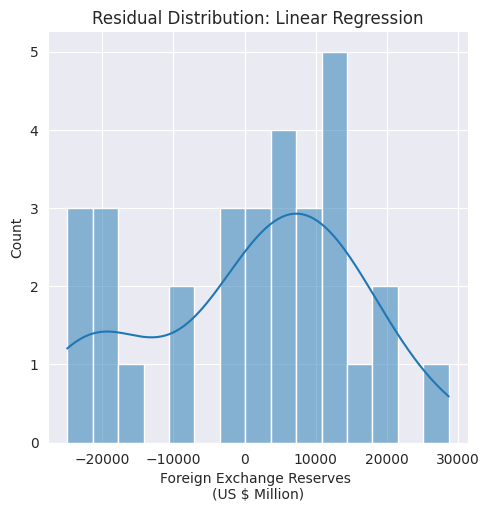

In [ ]:
plt.figure(figsize=(10,7),dpi=200);
sns.displot(linear_residual, kde=True, bins=15);
plt.title(label='Residual Distribution: Linear Regression');

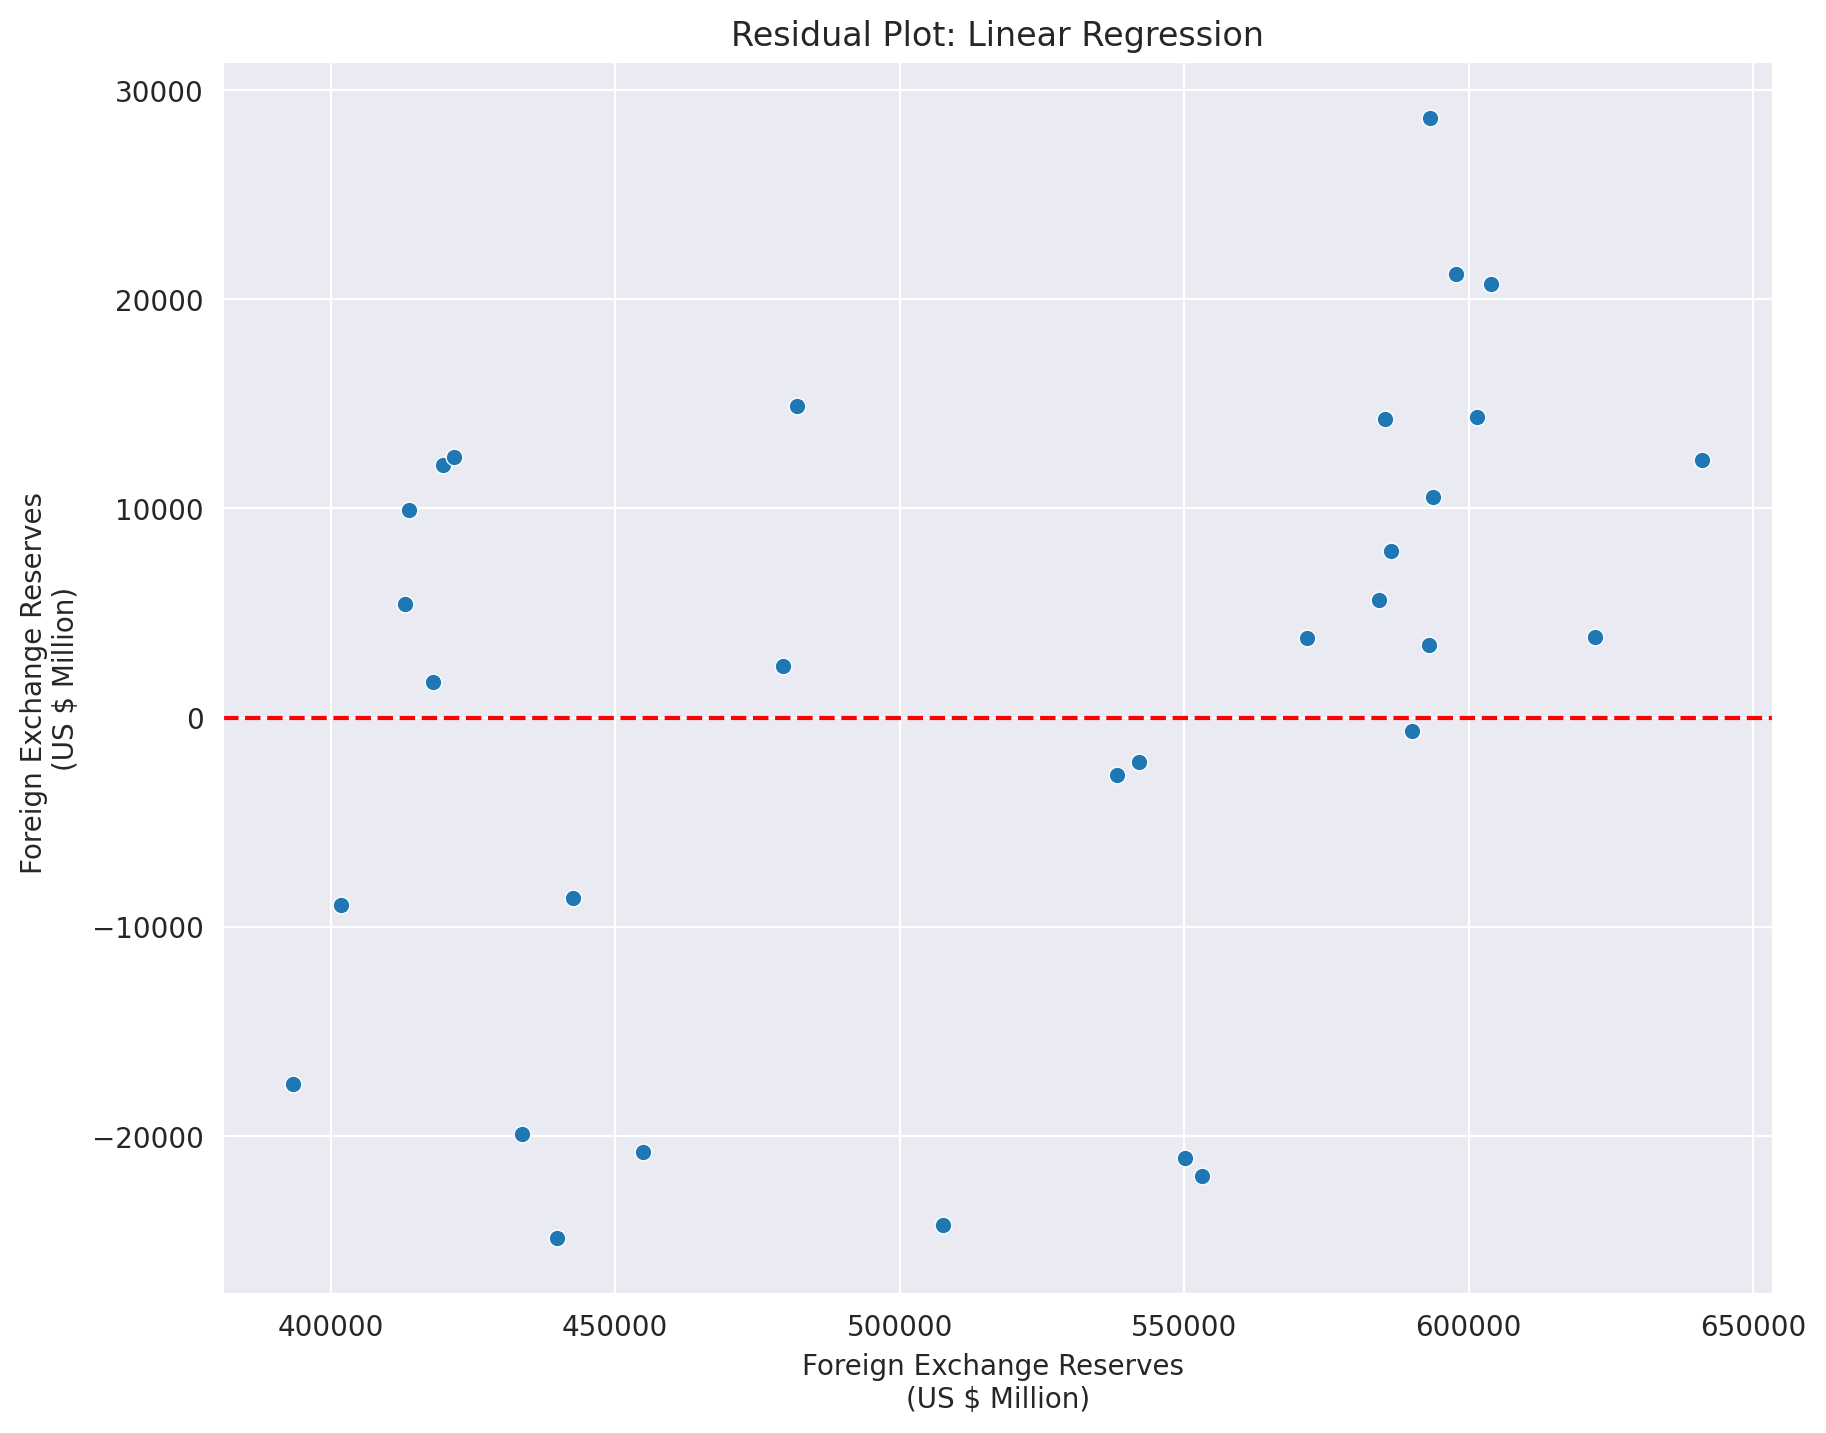

In [ ]:
plt.figure(figsize=(10,8),dpi=200);
sns.scatterplot(x=y_val,y=linear_residual);
plt.axhline(y=0, color='r', ls='--')
plt.title(label='Residual Plot: Linear Regression');

### Ridge Regression

In [ ]:
ridge_model = Ridge()

In [ ]:
param = {'alpha':[0.1,1,10,50]}

In [ ]:
grid_ridge = GridSearchCV(estimator=ridge_model,
                          param_grid=param,
                          scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'],
                          cv=5,
                          refit='neg_root_mean_squared_error',
                          error_score='raise')

In [ ]:
grid_ridge.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 50]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'])

In [ ]:
grid_ridge.best_estimator_

Ridge(alpha=1)

In [ ]:
print(f"Ridge Regression: neg_mean_absolute_error is {grid_ridge.cv_results_['mean_test_neg_mean_absolute_error'][0]:.2f}")

Ridge Regression: neg_mean_absolute_error is -10840.40


In [ ]:
print(f"Ridge Regression: neg_root_mean_squared_error is {grid_ridge.cv_results_['mean_test_neg_root_mean_squared_error'][0]:.2f}")

Ridge Regression: neg_root_mean_squared_error is -13956.56


In [ ]:
ridge_pred = grid_ridge.predict(scaled_X_val)

In [ ]:
print(f"Ridge Regression Train set score: {grid_ridge.score(scaled_X_train,y_train):.2f}")

Ridge Regression Train set score: -13140.99


In [ ]:
print(f"Ridge Regression Validation set score: {grid_ridge.score(scaled_X_val, y_val):.2f}")

Ridge Regression Validation set score: -15767.23


In [ ]:
print(f'Ridge Regression MAE: {mean_absolute_error(y_val,ridge_pred):.2f}')

Ridge Regression MAE: 13046.23


In [ ]:
print(f'Ridge Regression RMSE: {mean_squared_error(y_val, ridge_pred, squared=False):.2f}')

Ridge Regression RMSE: 15767.23


#### Residual Plot of Ridge Regression



In [ ]:
ridge_residual = y_val- ridge_pred

<Figure size 2000x1600 with 0 Axes>

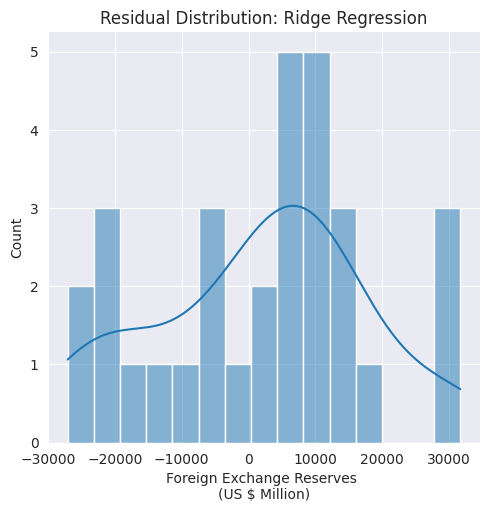

In [ ]:
plt.figure(figsize=(10,8),dpi=200);
sns.displot(ridge_residual, kde=True, bins=15);
plt.title(label='Residual Distribution: Ridge Regression');

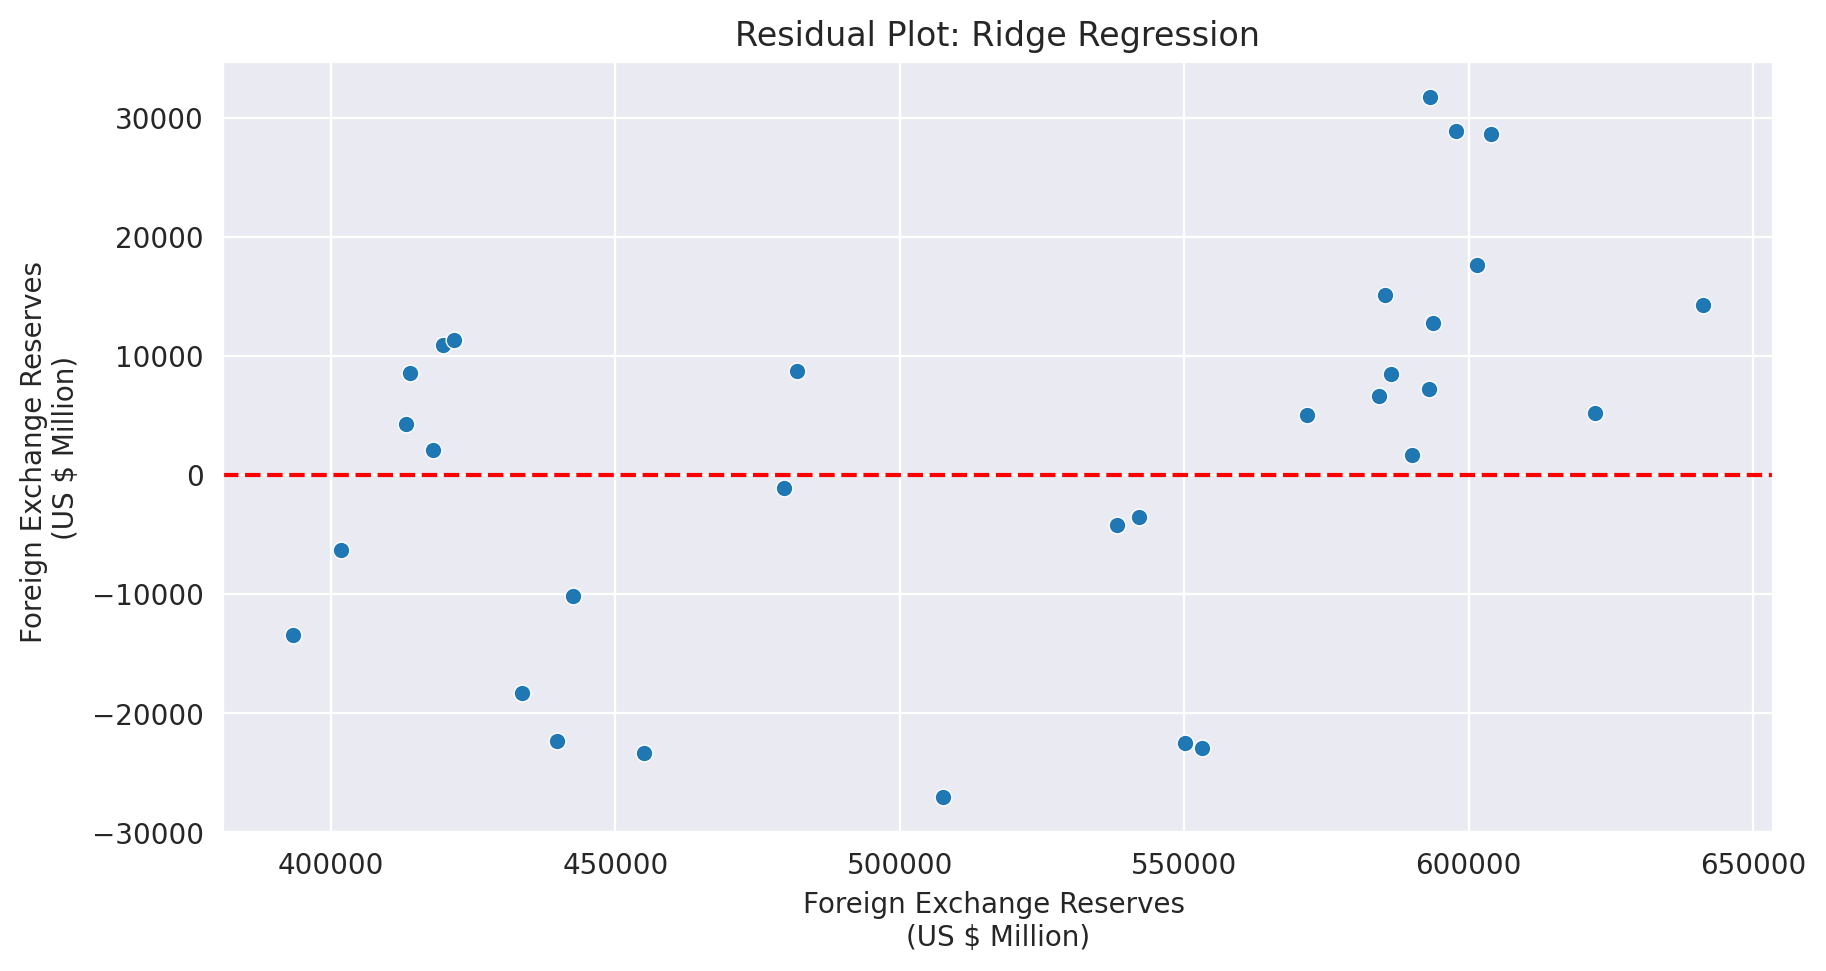

In [ ]:
plt.figure(figsize=(10,5),dpi=200);
sns.scatterplot(x=y_val,y=ridge_residual);
plt.axhline(y=0, color='r', ls='--')
plt.title(label='Residual Plot: Ridge Regression');

### KNeighbors Regressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
knn_regressor = KNeighborsRegressor()

In [42]:
param_knn = {'n_neighbors':[1,5,10,15]}

In [43]:
grid_knn = GridSearchCV(estimator=knn_regressor,
                        param_grid=param_knn,
                        cv=5,
                        scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'],
                        refit='neg_root_mean_squared_error',
                        n_jobs=-1,
                        error_score='raise')

In [44]:
grid_knn.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=KNeighborsRegressor(),
             n_jobs=-1, param_grid={'n_neighbors': [1, 5, 10, 15]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'])

In [45]:
grid_knn.best_params_

{'n_neighbors': 1}

In [46]:
print(f"KNN Regressor: neg_mean_absolute_error is {grid_knn.cv_results_['mean_test_neg_mean_absolute_error'][0]:.2f}")

KNN Regressor: neg_mean_absolute_error is -4580.13


In [47]:
print(f"KNN Regerssor: neg_root_mean_squared_error is {grid_knn.cv_results_['mean_test_neg_root_mean_squared_error'][0]:.2f}")

KNN Regerssor: neg_root_mean_squared_error is -6973.71


In [48]:
knn_pred = grid_knn.predict(scaled_X_val)

In [49]:
print(f'KNN Regressor Train set score: {grid_knn.score(scaled_X_train, y_train):.2f}')

KNN Regressor Train set score: -0.00


In [50]:
print(f'KNN Regressor Validation set score: {grid_knn.score(scaled_X_val, y_val):.2f}')

KNN Regressor Validation set score: -4316.27


In [51]:
print(f'KNN Regressor MAE: {mean_absolute_error(y_val,knn_pred):.2f}')

KNN Regressor MAE: 3496.80


In [52]:
print(f'KNN Regressor RMSE: {mean_squared_error(y_val, knn_pred, squared=False):.2f}')

KNN Regressor RMSE: 4316.27


#### Residual Plot of KNeighbors Regressor

In [ ]:
knn_residual = y_val - knn_pred

<Figure size 3000x2000 with 0 Axes>

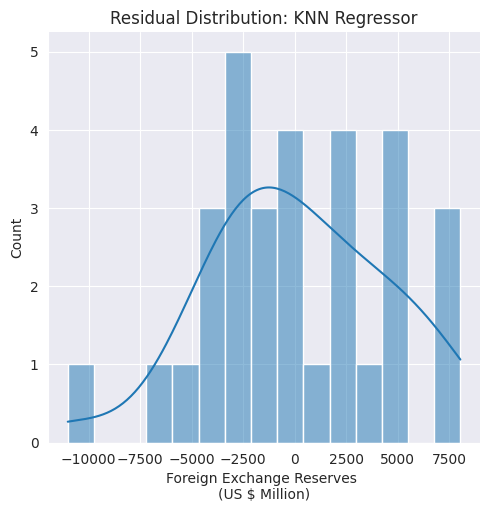

In [ ]:
plt.figure(figsize=(15,10),dpi=200);
sns.displot(knn_residual,kde=True,bins=15);
plt.title(label='Residual Distribution: KNN Regressor');

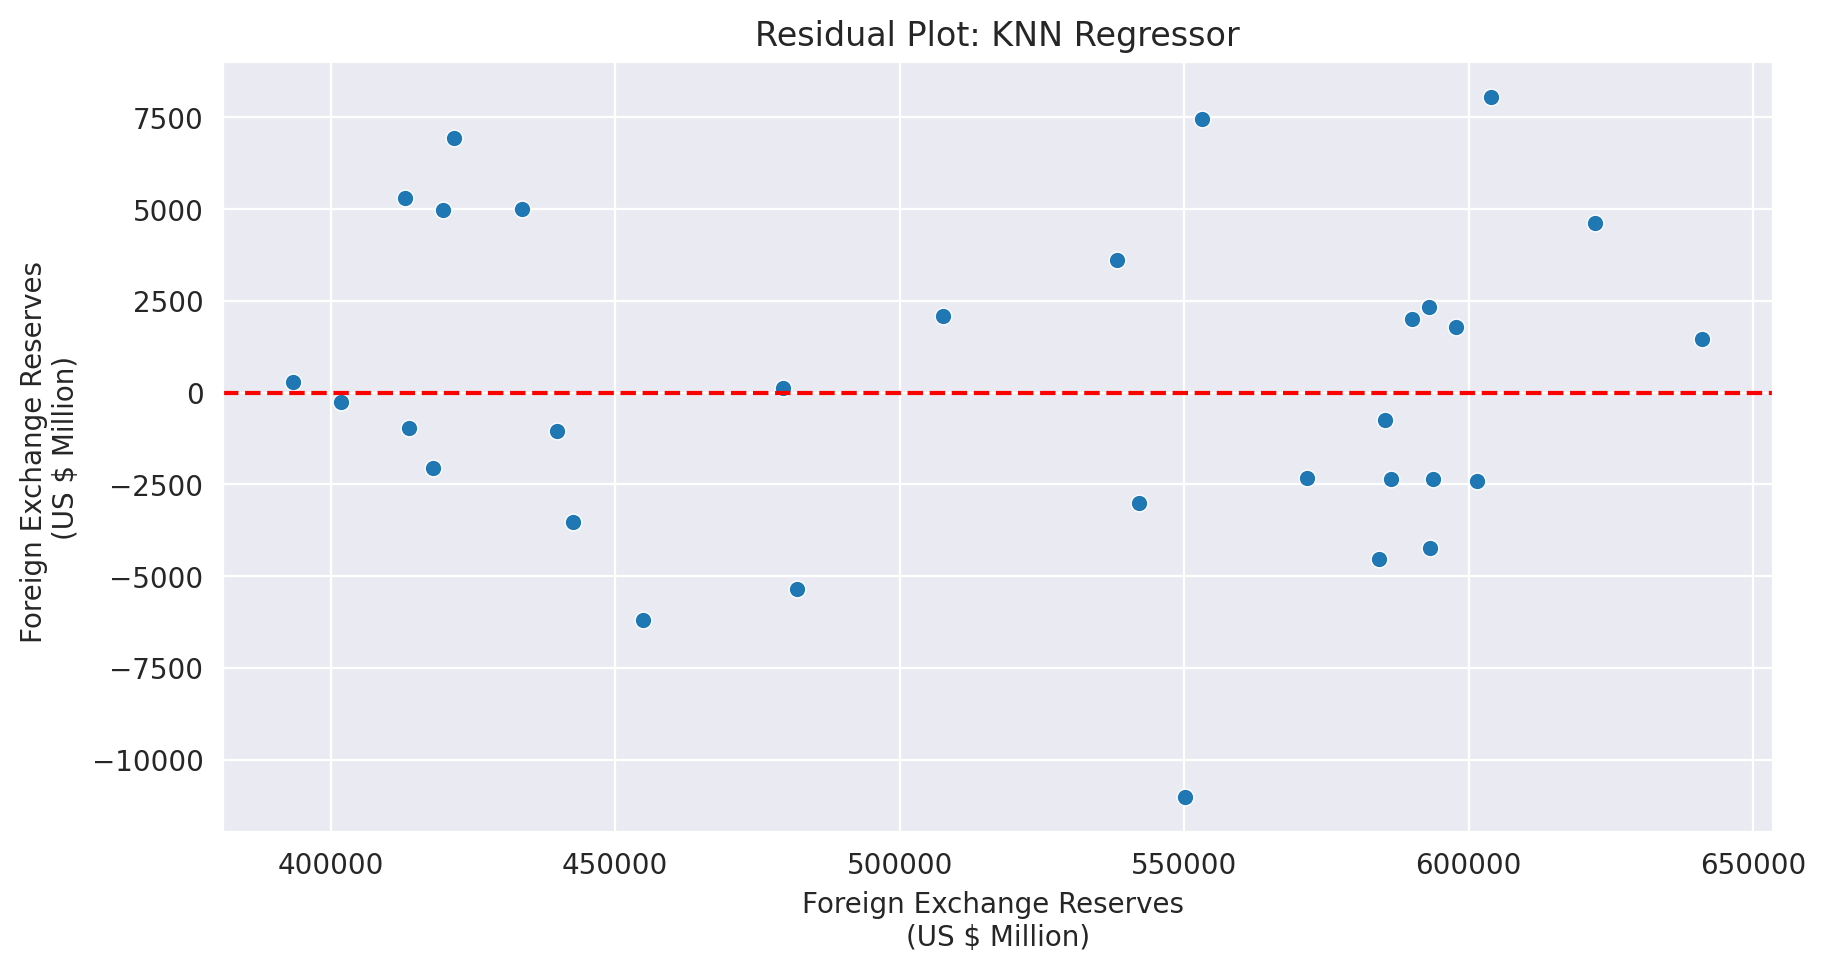

In [ ]:
plt.figure(figsize=(10,5),dpi=200);
sns.scatterplot(x=y_val,y=knn_residual);
plt.axhline(y=0, color='r', ls='--');
plt.title(label='Residual Plot: KNN Regressor');

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfg = RandomForestRegressor()

In [ ]:
param_random = {'n_estimators':[5,10,50,100,200],
                'max_features':['sqrt','log2',1,5,10],
                'max_depth':[2,3,4,5,6,7,8,9,10,15,20]}

In [ ]:
grid_random = GridSearchCV(estimator=rfg,
                           param_grid=param_random,
                           cv=5,
                           scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'],
                           refit='neg_root_mean_squared_error',
                           n_jobs=-1,
                           error_score='raise')

In [ ]:
grid_random.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', 1, 5, 10],
                         'n_estimators': [5, 10, 50, 100, 200]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'])

In [ ]:
grid_random.best_params_

{'max_depth': 9, 'max_features': 5, 'n_estimators': 50}

In [ ]:
print(f"Random Forest Regressor: neg_mean_absolute_error is {grid_random.cv_results_['mean_test_neg_mean_absolute_error'][0]:.2f}")

Random Forest Regressor: neg_mean_absolute_error is -17399.55


In [ ]:
print(f"Random Forest Regerssor: neg_root_mean_squared_error is {grid_random.cv_results_['mean_test_neg_root_mean_squared_error'][0]:.2f}")

Random Forest Regerssor: neg_root_mean_squared_error is -21767.77


In [ ]:
random_pred = grid_random.predict(X_val)

In [ ]:
print(f'Random Forest Regressor Train set score: {grid_random.score(X_train, y_train):.2f}')

Random Forest Regressor Train set score: -2724.56


In [ ]:
print(f'Random Forest Regressor Validation set score: {grid_random.score(X_val, y_val):.2f}')

Random Forest Regressor Validation set score: -7556.81


In [ ]:
print(f'Random Forest Regressor MAE: {mean_absolute_error(y_val,random_pred):.2f}')

Random Forest Regressor MAE: 4903.13


In [ ]:
print(f'Random Forest Regressor RMSE: {mean_squared_error(y_val,random_pred,squared=False):.2f}')

Random Forest Regressor RMSE: 7556.81


#### Residual Plot of Random Forest Regressor

In [ ]:
random_residual = y_val - random_pred

<Figure size 2000x1600 with 0 Axes>

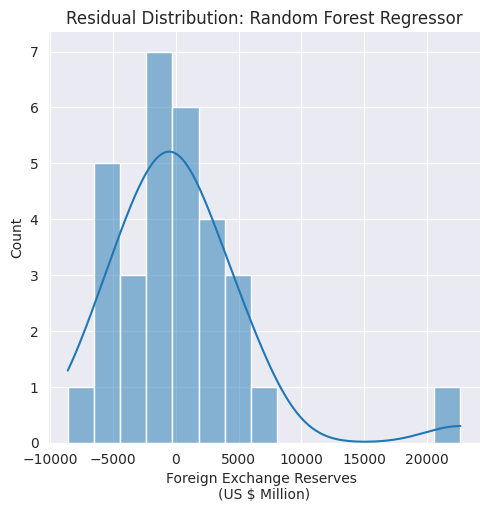

In [ ]:
plt.figure(figsize=(10,8),dpi=200);
sns.displot(random_residual,kde=True,bins=15);
plt.title(label='Residual Distribution: Random Forest Regressor');

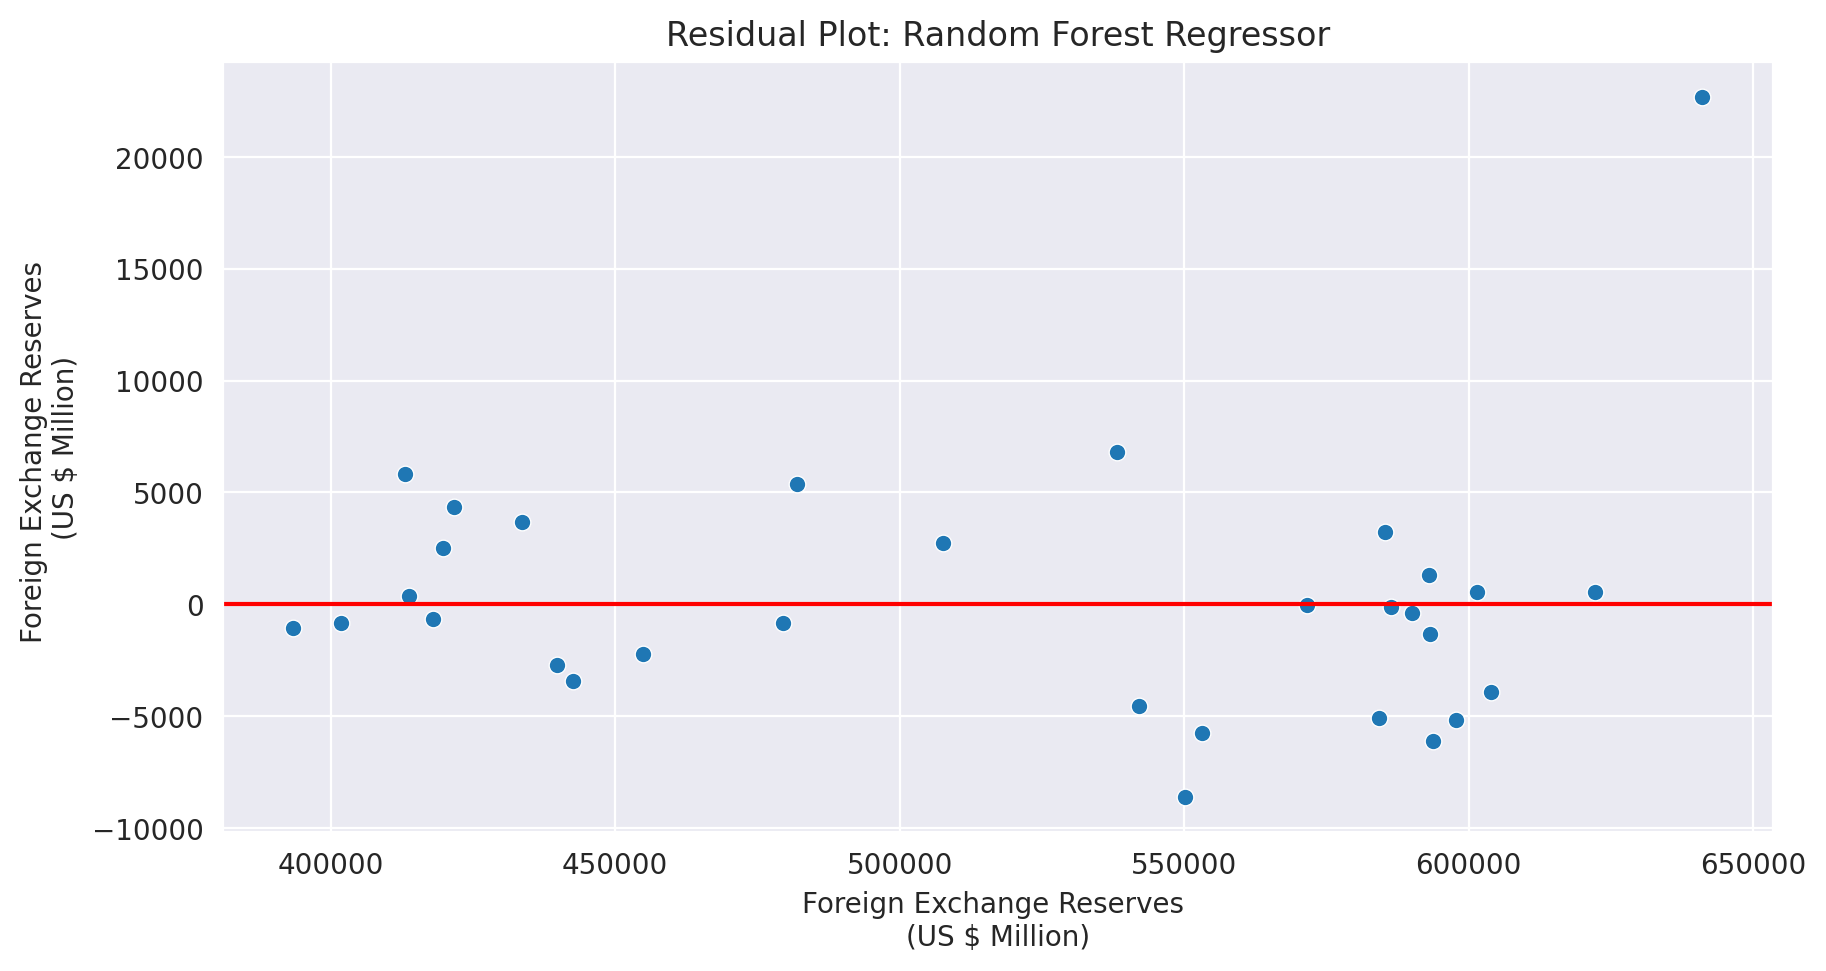

In [ ]:
plt.figure(figsize=(10,5),dpi=200);
sns.scatterplot(x=y_val,y=random_residual);
plt.axhline(y=0, color='r', ls='-');
plt.title(label='Residual Plot: Random Forest Regressor');

### Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()

In [ ]:
param_svr = {'C':[0.01,0.1,0.5,1.0,5.0],
             'gamma':['scale','auto'],
             'kernel':['linear','rbf','poly'],
             'degree':[2,3,4],
             'epsilon':[0,0.01,0.1,0.5,1,2]}

In [ ]:
grid_svr = GridSearchCV(estimator=svr,
                        param_grid=param_svr,
                        cv=5,
                        scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'],
                        refit='neg_root_mean_squared_error',
                        n_jobs=-1,
                        error_score='raise')

In [ ]:
grid_svr.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 5.0], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             refit='neg_root_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'])

In [ ]:
grid_svr.best_estimator_

SVR(C=5.0, degree=2, epsilon=2, kernel='linear')

In [ ]:
print(f"SVR: neg_mean_absolute_error is {grid_svr.cv_results_['mean_test_neg_mean_absolute_error'][0]:.2f}")

SVR: neg_mean_absolute_error is -78504.86


In [ ]:
print(f"SVR: neg_root_mean_squared_error is {grid_svr.cv_results_['mean_test_neg_root_mean_squared_error'][0]:.2f}")

SVR: neg_root_mean_squared_error is -88521.74


In [ ]:
svr_pred = grid_svr.predict(scaled_X_val)

In [ ]:
print(f'SVR Train set score: {grid_svr.score(scaled_X_train, y_train):.2f}')

SVR Train set score: -81831.18


In [ ]:
print(f'SVR Validation set score: {grid_svr.score(scaled_X_val, y_val):.2f}')

SVR Validation set score: -75608.42


In [ ]:
print(f'SVR MAE: {mean_absolute_error(y_val,svr_pred):.2f}')

SVR MAE: 67790.90


In [ ]:
print(f'SVR RMSE: {mean_squared_error(y_val,svr_pred,squared=False):.2f}')

SVR RMSE: 75608.42


#### Residual Plot of Support Vector Regressor

In [ ]:
svr_residual = y_val - svr_pred

<Figure size 2000x1600 with 0 Axes>

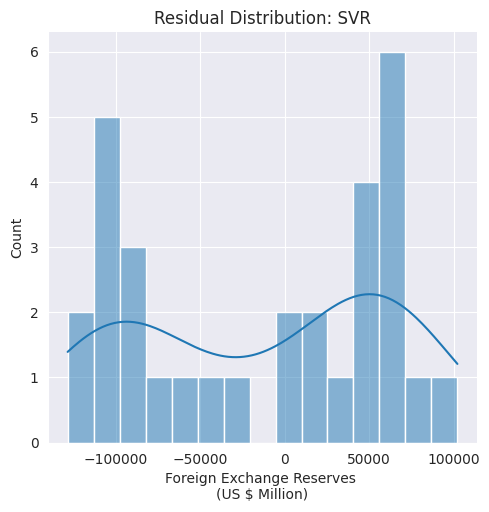

In [ ]:
plt.figure(figsize=(10,8),dpi=200);
sns.displot(svr_residual,kde=True,bins=15);
plt.title('Residual Distribution: SVR');

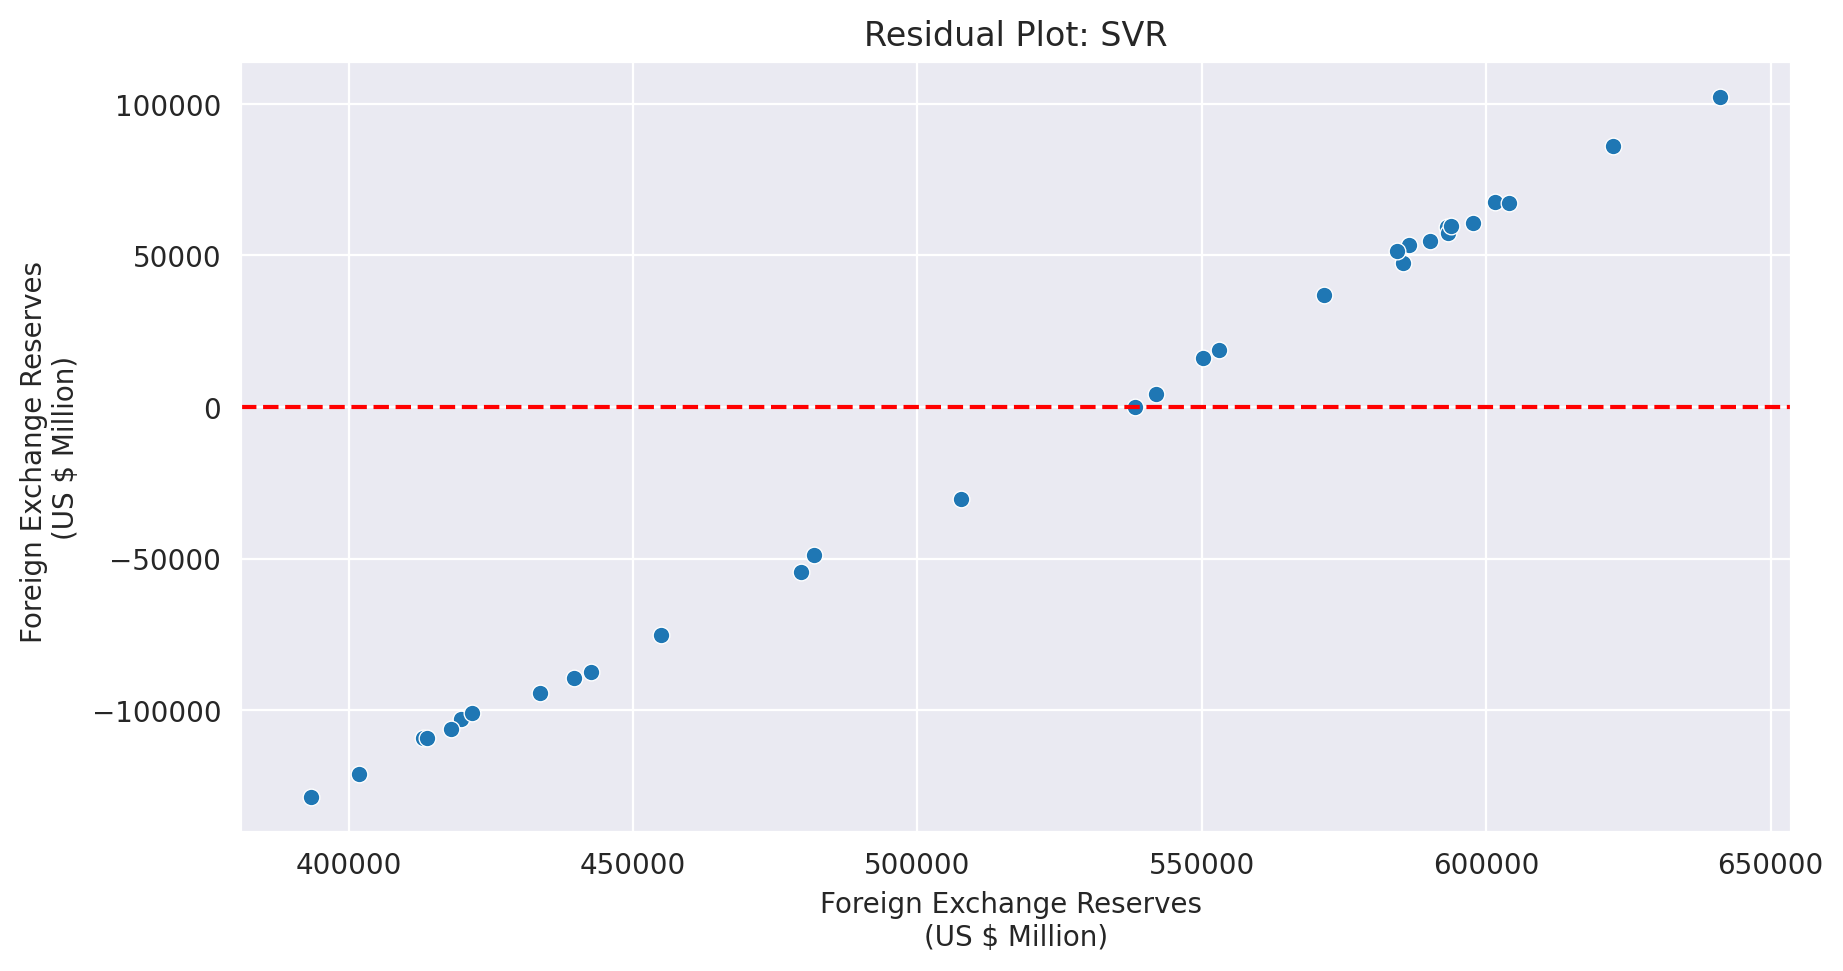

In [ ]:
plt.figure(figsize=(10,5),dpi=200);
sns.scatterplot(x=y_val,y=svr_residual);
plt.axhline(y=0, color='r', ls='--');
plt.title('Residual Plot: SVR');

## Inferences
After carefully examination of the above trained models we can clearly see that KNeighbors Regressor performs the best amongst the other models and Random Forest Regressor also performs quit well. Both models has a heigher negative root mean squared error.
From the residual plot of the KNN model we can see that KNN regressor's plot is uniformly scattered suggesting that it is a perfect model for this data. So we will choose KNN regressor model for further work.

## Final Test Set Evaluation

In [ ]:
test_pred = grid_knn.predict(scaled_X_test)

In [ ]:
print(f'Test set MAE: {mean_absolute_error(y_test, test_pred):.2f}')

Test set MAE: 3379.01


In [ ]:
print(f'Test set MSE: {mean_squared_error(y_test, test_pred, squared=False):.2f}')

Test set MSE: 4916.80


In [ ]:
df.describe()

,Forward Premia of US$ 1-month (%),Forward Premia of US$ 3-month (%),Forward Premia of US$ 6-month (%),Reverse Repo Rate (%),Marginal Standing Facility (MSF) Rate (%),Bank Rate (%),Base Rate (%),91-Day Treasury Bill (Primary) Yield (%),182-Day Treasury Bill (Primary) Yield (%),364-Day Treasury Bill (Primary) Yield (%),10-Year G-Sec Yield (FBIL) (%),Cash Reserve Ratio (%),Statutory Liquidity Ratio (%),Policy Repo Rate (%),Standing Deposit Facility (SDF) Rate (%),Foreign Exchange Reserves \n(US $ Million)
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,3.753467,3.772108,3.814254,4.309585,5.513738,5.513738,8.197284,5.194542,5.442296,5.592311,6.922794,3.936102,18.471246,5.263738,5.612658,514539.899077
std,1.094816,0.991583,0.959681,1.171990,1.017217,1.017217,0.688505,1.408069,1.409315,1.393577,0.612853,0.476102,0.630721,1.017217,0.397437,85856.064994
min,1.160000,1.210000,1.290000,3.350000,4.250000,4.250000,7.250000,2.929200,3.259900,3.389200,5.726800,3.000000,18.000000,4.000000,3.750000,392078.700000
25%,3.346090,3.514110,3.700088,3.350000,4.250000,4.250000,7.400000,3.522200,3.789900,3.949000,6.379100,4.000000,18.000000,4.000000,5.612658,421720.700000
50%,3.840000,3.950000,4.110000,3.350000,5.650000,5.650000,8.450000,5.558600,5.909900,6.139000,7.040100,4.000000,18.000000,5.400000,5.612658,538191.260000
75%,4.320000,4.370000,4.380000,5.750000,6.500000,6.500000,8.850000,6.437400,6.759900,6.879900,7.391500,4.000000,19.250000,6.250000,5.612658,590185.220000
max,8.978748,5.932387,5.587258,6.250000,6.750000,6.750000,8.950000,7.185800,7.446200,7.768300,8.073200,4.500000,20.000000,6.500000,6.250000,642453.190000


### Predicting Foreign Exchange Reserves for Future with artificial dataset
Now we will try to predict foreign exchange reserves from some artificial dataset.

#### Creating Artificial Dataset

In [ ]:
df_new = pd.DataFrame(data={'d1': ['2023-10-13', '2023-10-20', '2023-10-27', '2023-11-04', '2023-11-11', '2023-11-18', '2023-11-25'],
                            'd2': np.random.uniform(1.16, 8.98, 7),
                            'd3': np.random.uniform(1.21, 5.93, 7),
                            'd4': np.random.uniform(1.29, 5.59, 7),
                            'd5': np.random.uniform(3.35, 6.25, 7),
                            'd6': np.random.uniform(4.25, 6.75, 7),
                            'd7': np.random.uniform(4.25, 6.75, 7),
                            'd8': np.random.uniform(7.25, 8.95, 7),
                            'd9': np.random.uniform(2.93, 7.19, 7),
                            'd10': np.random.uniform(3.26, 7.45, 7),
                            'd11': np.random.uniform(3.39, 7.77, 7),
                            'd12': np.random.uniform(5.72, 8.07, 7),
                            'd13': np.random.uniform(3.00, 4.50, 7),
                            'd14': np.random.uniform(18.0, 20.0, 7),
                            'd15': np.random.uniform(4.00, 6.50, 7),
                            'd16': np.random.uniform(3.75, 6.25, 7)},
                      )
df_new.columns = ['Period', 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)',
                               'Forward Premia of US$ 6-month (%)', 'Reverse Repo Rate (%)',
                               'Marginal Standing Facility (MSF) Rate (%)', 'Bank Rate (%)',
                               'Base Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)',
                               '182-Day Treasury Bill (Primary) Yield (%)', '364-Day Treasury Bill (Primary) Yield (%)',
                               '10-Year G-Sec Yield (FBIL) (%)', 'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                               'Policy Repo Rate (%)', 'Standing Deposit Facility (SDF) Rate (%)']

In [ ]:
df_new

,Period,Forward Premia of US$ 1-month (%),Forward Premia of US$ 3-month (%),Forward Premia of US$ 6-month (%),Reverse Repo Rate (%),Marginal Standing Facility (MSF) Rate (%),Bank Rate (%),Base Rate (%),91-Day Treasury Bill (Primary) Yield (%),182-Day Treasury Bill (Primary) Yield (%),364-Day Treasury Bill (Primary) Yield (%),10-Year G-Sec Yield (FBIL) (%),Cash Reserve Ratio (%),Statutory Liquidity Ratio (%),Policy Repo Rate (%),Standing Deposit Facility (SDF) Rate (%)
0,2023-10-13,1.725786,1.607239,3.555663,6.046240,4.429976,5.426965,8.556089,6.851990,4.579891,6.018870,7.615416,3.433910,18.073840,4.396692,4.410538
1,2023-10-20,1.566482,5.131053,4.168649,4.838021,6.622043,5.212175,7.312846,7.107560,6.474681,4.893928,7.574865,4.332469,19.154466,4.261310,4.085807
2,2023-10-27,7.535976,2.750404,3.333129,6.195864,4.447974,4.305653,8.529008,4.962759,4.339192,6.292184,6.084497,4.071634,18.075008,5.104032,4.859852
3,2023-11-04,6.892975,2.699735,2.935516,4.102633,5.456484,5.579836,8.483437,4.313781,5.800653,7.642195,7.938874,3.056349,18.025051,5.054522,4.311914
4,2023-11-11,7.756411,4.566818,2.903429,5.257679,6.143854,4.682420,7.510899,6.846839,3.739301,7.312106,6.298771,3.089792,18.223230,5.678565,4.362749
5,2023-11-18,3.588227,4.681664,1.474119,4.727341,4.421421,5.073942,7.609014,4.356742,5.545943,3.957811,7.496059,3.115581,18.591495,6.044071,3.940897
6,2023-11-25,7.163526,2.552198,3.362853,5.637446,6.305493,5.544111,7.436649,3.257263,4.406237,3.794733,5.875416,4.092237,19.356816,4.040204,4.037047


In [ ]:
X_new = df_new.copy()

In [ ]:
X_new['Period'] = pd.to_datetime(X_new['Period'])
X_new['Period'] = X_new['Period'].map(datetime.datetime.toordinal)

In [ ]:
scaled_X_new = scaler.transform(X_new)

In [ ]:
X_new_pred = grid_knn.predict(scaled_X_new)

In [ ]:
df_new['Foreign Exchange Reserves \n(US $ Million)'] = X_new_pred

In [ ]:
df_new = df_new.sort_values(by='Period', ascending=False)

In [ ]:
df['Foreign Exchange Reserves Type'] = ['Actual Foreign Exchange Reserves' for _ in df.Period]
df_new['Foreign Exchange Reserves Type'] = ['Predicted Foreign Exchange Reserves' for _ in df_new.Period]

In [ ]:
df_final = pd.concat([df_new, df], ignore_index=True)

In [ ]:
# df_final.head(10)

In [ ]:
fig3 = px.line(data_frame=df_final, x='Period', y='Foreign Exchange Reserves \n(US $ Million)', color='Foreign Exchange Reserves Type', symbol='Foreign Exchange Reserves Type',
               title='Current & Estimated Foreign Exchange Reserves (US $ Million)')
fig3.update_xaxes(title_text='Period', tickangle=-45)
fig3.update_yaxes(title_text='Foreign Exchange Reserves (US $ Million)')

The above plot shows the current and estimated foreign exchange reserves. There is a drastic dip in reserves in Oct 2023 but then the graph returns to its usual trend.

## Note
The model I selected for the final test set, as well as the models I tested so far, generally make accurate predictions when given different feature values. However, I've noticed that they may produce repeated outputs when presented with input values that were previously seen in the training or validation data. This could be an indication that the model is overfitting to the existing data and may not generalize well to truly novel inputs.

Given that this dataset is time series-based, it makes sense to use a time series forecasting model for this task. There are numerous time series forecasting techniques available, and for this particular dataset, I believe the Facebook Prophet model from the prophet library would be a suitable choice.

The Prophet model is a powerful and flexible tool for forecasting time series data. It can handle non-linear trends, seasonal patterns, and even holiday effects - all of which can be important factors when working with time-dependent data. By leveraging the Prophet model, I should be able to capture the underlying temporal dynamics of the dataset more effectively than some generic machine learning models.

## Prophet Model


### Initializing Prophet Model

In [53]:
from prophet import Prophet

In [54]:
mdl = Prophet(weekly_seasonality=True)

In [55]:
mdl.add_regressor('Forward Premia of US$ 1-month (%)', mode='additive')
mdl.add_regressor('Forward Premia of US$ 3-month (%)', mode='additive')
mdl.add_regressor('Forward Premia of US$ 6-month (%)', mode='additive')
mdl.add_regressor('Reverse Repo Rate (%)', mode='additive')
mdl.add_regressor('Marginal Standing Facility (MSF) Rate (%)', mode='additive')
mdl.add_regressor('Bank Rate (%)', mode='additive')
mdl.add_regressor('Base Rate (%)', mode='additive')
mdl.add_regressor('91-Day Treasury Bill (Primary) Yield (%)', mode='additive')
mdl.add_regressor('182-Day Treasury Bill (Primary) Yield (%)', mode='additive')
mdl.add_regressor('364-Day Treasury Bill (Primary) Yield (%)', mode='additive')
mdl.add_regressor('10-Year G-Sec Yield (FBIL) (%)', mode='additive')
mdl.add_regressor('Cash Reserve Ratio (%)', mode='additive')
mdl.add_regressor('Statutory Liquidity Ratio (%)', mode='additive')
mdl.add_regressor('Policy Repo Rate (%)', mode='additive')
mdl.add_regressor('Standing Deposit Facility (SDF) Rate (%)', mode='additive')

### Creating Traning set and Test set for Prophet Model
We can not use previously generated training set and test, so we need to fo it again. Before feeding the data into the Prophet model, I'll need to ensure that the column names in the test set are appropriately formatted for the model's requirements. The Prophet library expects specific column names, so I'll need to do some preprocessing to align the test set with the model's expected input format.

Typically, the Prophet model expects the data to be in a DataFrame with three columns: 'ds' for the date/timestamp, 'y' for the target variable, and potentially additional covariates in additional columns. So, I'll need to carefully map the existing column names in the test set to match this structure.

In [56]:
X_ = df.drop('Foreign Exchange Reserves \n(US $ Million)', axis=1)
y_ = df['Foreign Exchange Reserves \n(US $ Million)']

In [57]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [58]:
df_mdl = pd.concat([X_train_, y_train_], axis=1, ignore_index=True)
df_mdl.columns = ['ds', 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)',
                               'Forward Premia of US$ 6-month (%)', 'Reverse Repo Rate (%)',
                               'Marginal Standing Facility (MSF) Rate (%)', 'Bank Rate (%)',
                               'Base Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)',
                               '182-Day Treasury Bill (Primary) Yield (%)', '364-Day Treasury Bill (Primary) Yield (%)',
                               '10-Year G-Sec Yield (FBIL) (%)', 'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                               'Policy Repo Rate (%)', 'Standing Deposit Facility (SDF) Rate (%)', 'y']

In [59]:
mdl.fit(df_mdl)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprg7urogb/_x1hxjd4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprg7urogb/q_e4smgo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11031', 'data', 'file=/tmp/tmprg7urogb/_x1hxjd4.json', 'init=/tmp/tmprg7urogb/q_e4smgo.json', 'output', 'file=/tmp/tmprg7urogb/prophet_modelkg789rep/prophet_model-20240405110516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:05:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [60]:
# Renaming test set columns suitable for prophet model
X_test_.columns = ['ds', 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)',
                               'Forward Premia of US$ 6-month (%)', 'Reverse Repo Rate (%)',
                               'Marginal Standing Facility (MSF) Rate (%)', 'Bank Rate (%)',
                               'Base Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)',
                               '182-Day Treasury Bill (Primary) Yield (%)', '364-Day Treasury Bill (Primary) Yield (%)',
                               '10-Year G-Sec Yield (FBIL) (%)', 'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                               'Policy Repo Rate (%)', 'Standing Deposit Facility (SDF) Rate (%)']

In [61]:
pred_ = mdl.predict(X_test_)

In [62]:
pred_[['ds', 'yhat_upper', 'yhat_upper', 'yhat']][::-1].head()

,ds,yhat_upper,yhat_upper,yhat
62,2023-09-15,609153.984539,609153.984539,598802.211701
61,2023-09-01,609447.068938,609447.068938,599686.327944
60,2023-08-18,608629.253041,608629.253041,598012.033698
59,2023-08-04,609200.255044,609200.255044,598821.383392
58,2023-06-09,601232.121227,601232.121227,591394.012286


In [63]:
yhat = pred_[['yhat']][::-1]

In [64]:
_y_test_ = y_test_.sort_index()

In [65]:
print(f'Prophet Model MAE: {mean_absolute_error(_y_test_,yhat):.2f}')

Prophet Model MAE: 5579.11


In [67]:
print(f'Prophet Model RMSE: {mean_squared_error(_y_test_,yhat,squared=False):.2f}')

Prophet Model RMSE: 7039.04


### Future Reserves Prediction using Prophet Model

In [85]:
tst = pd.DataFrame(data={'ds': ['2023-10-13', '2023-10-20', '2023-10-27', '2023-11-04', '2023-11-11', '2023-11-18', '2023-11-25'],
                         'Forward Premia of US$ 1-month (%)': np.random.uniform(1.16, 8.98, 7),  # [5.34]
                         'Forward Premia of US$ 3-month (%)': np.random.uniform(1.21, 5.93, 7),  # [4.48]
                         'Forward Premia of US$ 6-month (%)': np.random.uniform(1.29, 5.59, 7), # [3.64]
                         'Reverse Repo Rate (%)': np.random.uniform(3.35, 6.25, 7),  # [5.12]
                         'Marginal Standing Facility (MSF) Rate (%)': np.random.uniform(4.25, 6.75, 7),  # [5.12]
                         'Bank Rate (%)': np.random.uniform(4.25, 6.75, 7),  # [5.74]
                         'Base Rate (%)': np.random.uniform(7.25, 8.95, 7),  # [7.99]
                         '91-Day Treasury Bill (Primary) Yield (%)': np.random.uniform(2.93, 7.19, 7),  # [4.46]
                         '182-Day Treasury Bill (Primary) Yield (%)': np.random.uniform(3.26, 7.45, 7),  # [6.16]
                         '364-Day Treasury Bill (Primary) Yield (%)': np.random.uniform(3.39, 7.77, 7),  # [3.97]
                         '10-Year G-Sec Yield (FBIL) (%)': np.random.uniform(5.72, 8.07, 7),  # [8.45]
                         'Cash Reserve Ratio (%)': np.random.uniform(3.00, 4.50, 7),  # [3.62]
                         'Statutory Liquidity Ratio (%)': np.random.uniform(18.0, 20.0, 7),  # [18.65]
                         'Policy Repo Rate (%)': np.random.uniform(4.00, 6.50, 7),  # [5.23]
                         'Standing Deposit Facility (SDF) Rate (%)': np.random.uniform(3.75, 6.25, 7),  # [5.36]
                        }
                      )

In [86]:
pred_tst = mdl.predict(tst)

In [87]:
tst['Foreign Exchange Reserves \n(US $ Million)'] = pred_tst[['yhat']]

In [88]:
tst = tst.sort_values(by='ds', ascending=False)

In [89]:
tst_copy = tst.copy()
tst_copy.rename(columns={'ds': 'Period'}, inplace=True)

In [90]:
df['Foreign Exchange Reserves Type'] = ['Actual Foreign Exchange Reserves' for _ in df.Period]
tst_copy['Foreign Exchange Reserves Type'] = ['Predicted Foreign Exchange Reserves' for _ in tst_copy.Period]

In [91]:
new_df = pd.concat([tst_copy, df], ignore_index=True)

In [92]:
fig4 = px.line(data_frame=new_df, x='Period', y='Foreign Exchange Reserves \n(US $ Million)', color='Foreign Exchange Reserves Type', symbol='Foreign Exchange Reserves Type',
               title='Current & Estimated Foreign Exchange Reserves (US $ Million)', height=500)
fig4.update_xaxes(title_text='Period', tickangle=-45)
fig4.update_yaxes(title_text='Foreign Exchange Reserves (US $ Million)')

The plot shows the current and estimated foreign exchange reserves (in US$ million) over time from 2018 to 2024. The orange line represents the actual foreign exchange reserves, while the blue line represents the predicted or estimated future foreign exchange reserves.

The key observations from the plot are:

1. The actual foreign exchange reserves have fluctuated over the years, with a generally increasing trend from 2018 to 2021.

2. In 2022, there is a noticeable dip in the actual foreign exchange reserves, likely due to some economic or geopolitical factors.

3. However, the predicted foreign exchange reserves (blue line) show a sharp increase in 2023 and 2024, suggesting that the foreign exchange reserves are expected to recover and grow substantially in the coming years.

4. The gap between the actual and predicted foreign exchange reserves is widest in 2024, indicating a significant increase in the projected foreign exchange reserves compared to the current levels.

Overall, the plot depicts the historical trend and future projections of a country's foreign exchange reserves, which are an important indicator of its economic strength and ability to manage international financial transactions.

In [84]:
# Testing if repeating past feature values gives a repeated output
d = pd.DataFrame(data=[['2026-10-15', 5.34, 4.48, 3.64, 5.12, 5.32, 6.13, 7.99, 4.46, 6.16, 3.97, 8.45, 3.62, 18.65, 5.23, 5.36],
                       ['2027-10-15', 5.34, 4.48, 3.64, 5.12, 5.32, 6.13, 7.99, 4.46, 6.16, 3.97, 8.45, 3.62, 18.65, 5.23, 5.36],
                       ['2028-10-15', 5.34, 4.48, 3.64, 5.12, 5.32, 6.13, 7.99, 4.46, 6.16, 3.97, 8.45, 3.62, 18.65, 5.23, 5.36]],
                columns=['ds', 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)',
                               'Forward Premia of US$ 6-month (%)', 'Reverse Repo Rate (%)',
                               'Marginal Standing Facility (MSF) Rate (%)', 'Bank Rate (%)',
                               'Base Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)',
                               '182-Day Treasury Bill (Primary) Yield (%)', '364-Day Treasury Bill (Primary) Yield (%)',
                               '10-Year G-Sec Yield (FBIL) (%)', 'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                               'Policy Repo Rate (%)', 'Standing Deposit Facility (SDF) Rate (%)'])
mdl.predict(d)['yhat']

0    9.290846e+05
1    9.904721e+05
2    1.085555e+06
Name: yhat, dtype: float64

The predicted values are not constant, rather increasing suggesting prophet is a suitable model for this dataset.

## Saving Model for Deployment

In [93]:
joblib.dump(mdl, 'foreign_reserves_prophet.joblib')

['foreign_reserves_prophet.joblib']